# Задача классификации. Дерево решений



In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import seaborn as sns
from sklearn import tree

In [3]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/students.csv', delimiter=',')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186 entries, 0 to 185
Data columns (total 48 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Age                          186 non-null    int64  
 1   Growth                       186 non-null    int64  
 2   Shoe size                    186 non-null    int64  
 3   Course number                186 non-null    int64  
 4   Year of birth                186 non-null    int64  
 5   Friend number                186 non-null    int64  
 6   Russian rating               186 non-null    int64  
 7   Maths rating                 186 non-null    int64  
 8   Physics rating               186 non-null    int64  
 9   Computer science rating      186 non-null    int64  
 10  Chemistry rating             186 non-null    int64  
 11  Literature rating            186 non-null    int64  
 12  History rating               186 non-null    int64  
 13  Geography rating    

In [4]:
df_cut=df[['Growth','Weight','Sex','Hair length','Children number']]
df_cut=df_cut.dropna()

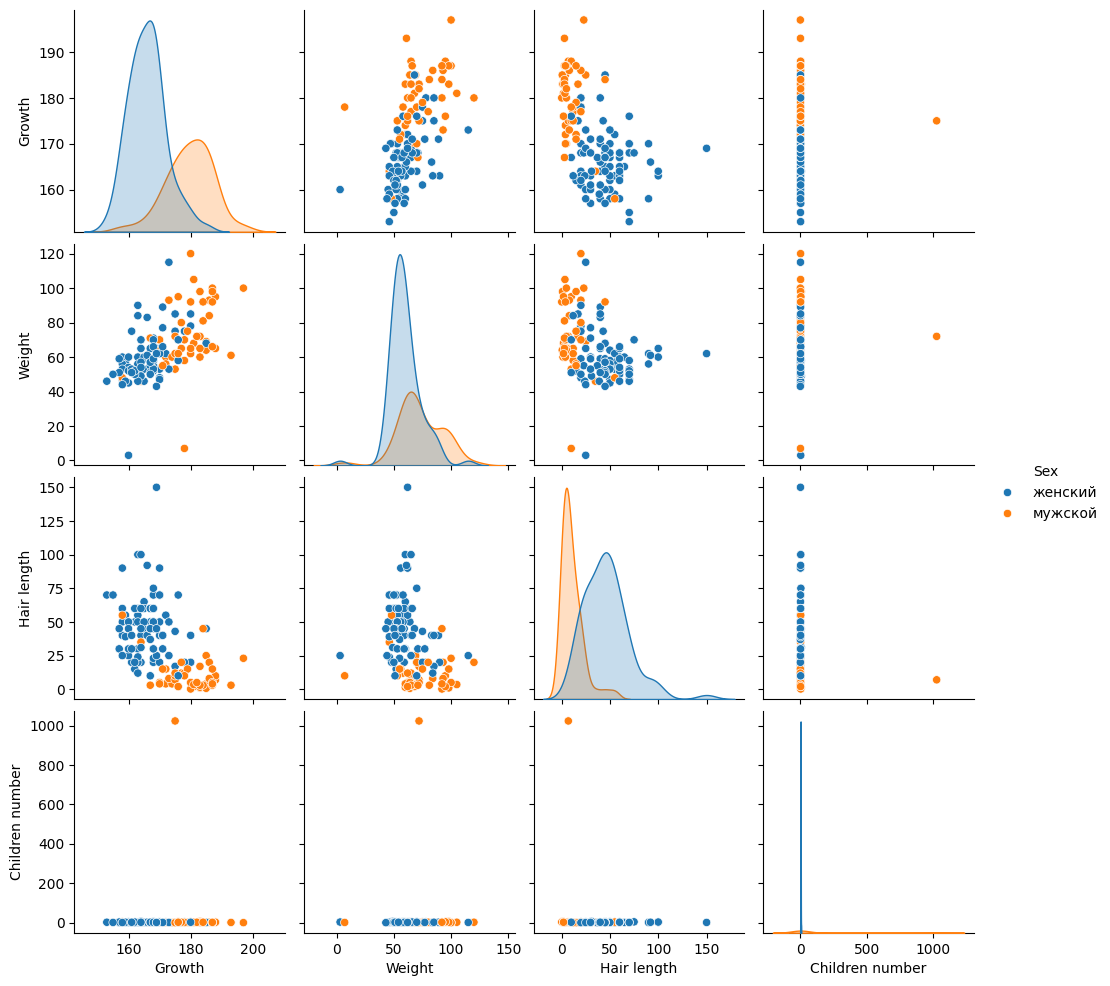

In [5]:
sns.pairplot(df_cut, hue='Sex')

Гипотеза: угадать пол человека можно за небольшое количество вопросов. И модель эти вопросы найдет автоматически.

In [6]:
model=tree.DecisionTreeClassifier(max_depth=2)
model.fit(df_cut[['Growth','Weight','Hair length','Children number']].values.reshape(-1,4), y=df_cut['Sex'].values)

DecisionTreeClassifier(max_depth=2)

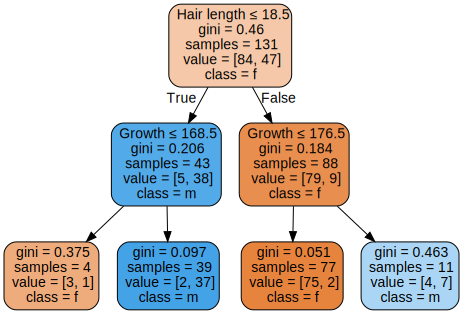

In [7]:
import graphviz
dot_data = tree.export_graphviz(model, out_file=None,
                      feature_names=['Growth', 'Weight', 'Hair length', 'Children number'],
                      class_names=['f', 'm'],
                     filled=True, rounded=True,
                      special_characters=True)
graph = graphviz.Source(dot_data)
graph

Загружаем тестовую выбоку

In [8]:
df_test=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/students_test.csv', delimiter=',')
df_test_cut=df_test[['Growth','Weight','Sex','Hair length','Children number']]
df_test_cut=df_test_cut.dropna()

Внимание: через функцию predict прогоняем объекты **тестовой** выборки

In [9]:
df_test_cut['Predicted']=model.predict(df_test_cut[['Growth','Weight','Hair length','Children number']].values.reshape(-1,4))

Метрики качества задачи классификации

In [10]:
pd.crosstab(df_test_cut['Predicted'],df_test_cut['Sex'])

Sex,женский,мужской
Predicted,,
женский,40,1
мужской,2,25


Так считаются метрики качества в задаче классификации

Есть два показателя: precision и recall. Их можно подсчитать для каждого класса.

**recall(для женщин)=доля правильно предсказанных женщин среди среди всех женщин**

В нашем примере: recall(для женщин)=40/(40+2)=0.9523809523809523

**recall(для мужчин)=доля правильно предсказанных мужчин среди среди всех мужчин**

В нашем примере: recall(для мужчин)=25/(25+1)=0.9615384615384616

**precision(для женщин)=доля истинных женщин среди людей, отнесенных ИИ к женщинам**

В нашем примере: precision(для женщин)=40/(40+1)=0.975609756097561

**precision(для мужчин)=доля истинных мужчин среди людей, отнесенных ИИ к мужчинам**

В нашем примере: precision(для мужчин)=25/(25+2)=0.9259259259259259



In [11]:
from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(df_test_cut['Sex'], df_test_cut['Predicted'])

(array([0.97560976, 0.92592593]),
 array([0.95238095, 0.96153846]),
 array([0.96385542, 0.94339623]),
 array([42, 26]))

In [12]:
df_cut=df[['Hair length','Shoe size','Sex']]


In [13]:
model=tree.DecisionTreeClassifier(max_depth=2)
model.fit(df_cut[['Hair length','Shoe size']].values.reshape(-1,2), y=df_cut['Sex'].values)

DecisionTreeClassifier(max_depth=2)

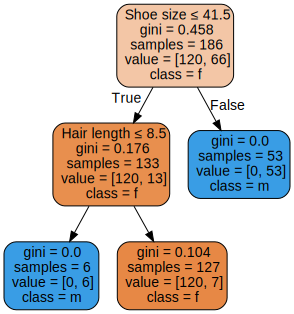

In [14]:
import graphviz
dot_data = tree.export_graphviz(model, out_file=None,
                      feature_names=['Hair length','Shoe size'],
                      class_names=['f', 'm'],
                     filled=True, rounded=True,
                      special_characters=True)
graph = graphviz.Source(dot_data)
graph

In [15]:
df_test=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/students_test.csv', delimiter=',')
df_test_cut=df_test[['Hair length','Shoe size','Sex']]
df_test_cut=df_test_cut.dropna()

In [16]:
df_test_cut['Predicted']=model.predict(df_test_cut[['Hair length','Shoe size']])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


In [17]:
pd.crosstab(df_test_cut['Predicted'],df_test_cut['Sex'])

Sex,женский,мужской
Predicted,,
женский,61,2
мужской,1,34


In [18]:
from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(df_test_cut['Sex'], df_test_cut['Predicted'])

(array([0.96825397, 0.97142857]),
 array([0.98387097, 0.94444444]),
 array([0.976     , 0.95774648]),
 array([62, 36]))